In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3D 그래프 그리는 라이브러리

# 공부 시간 x와 y의 성적 리스트 만들기
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
# x와 y 리스트 선언
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

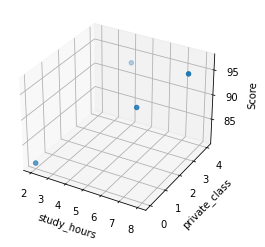

In [2]:
ax = plt.axes(projection='3d') # 그래프 유형 정하기
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter(x1,x2,y)
plt.show()

In [3]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [4]:
# 기울기 a와 절편 b 값 초기화
a1=0
a2=0
b=0

In [5]:
# 학습률
lr = 0.02

In [6]:
# 반복 횟수 + 1
epochs = 2001

In [10]:
# 경사하강법 시작
for i in range(epochs):
    y_pred = a1 * x1_data + a2*x2_data +b # y 구하는 식 세우기
    error = y_data - y_pred  #오차 구하는 식

    # 평균 제곱 오차를 a로 미분한 결과
    a1_diff = -(2/len(x1_data)) * sum(x1_data *(error))
    a2_diff = -(2/len(x2_data)) * sum(x2_data *(error))

    # 편균 제곱 오차를 b로 미분한 결과
    b_diff = -(2/len(x1_data)) * sum(y_data - y_pred)
    
    a1 = a1 - lr * a1_diff # 미분 결과에 학습률 곱한 후 기존의 a1 값 업데이트
    a2 = a2 - lr * a2_diff # 미분 결과에 학습률 곱한 후 기존의 a2 값 업데이트
    b = b - lr * b_diff # 미분 결과에 학습률 곱한 후 기존의 b 값 업데이트
    
    if i%100 == 0:
         print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f, a1편미분=%.04f,a2편미분=%.04f, b편미분=%.04f" %(i, a1 ,a2, b,a1_diff,a2_diff,b_diff))
 

epoch=0, 기울기1=11.7579, 기울기2=5.4460, 절편=3.9353, a1편미분=100.2939,a2편미분=44.1920, b편미분=-7.2996
epoch=100, 기울기1=7.1896, 기울기2=4.2490, 절편=38.7957, a1편미분=1.8178,a2편미분=0.6242, b편미분=-12.4714
epoch=200, 기울기1=4.5103, 기울기2=3.3251, 절편=57.1886, a1편미분=0.9611,a2편미분=0.3318, b편미분=-6.5990
epoch=300, 기울기1=3.0928, 기울기2=2.8357, 절편=66.9208, a1편미분=0.5086,a2편미분=0.1756, b편미분=-3.4917
epoch=400, 기울기1=2.3428, 기울기2=2.5767, 절편=72.0704, a1편미분=0.2691,a2편미분=0.0929, b편미분=-1.8476
epoch=500, 기울기1=1.9460, 기울기2=2.4397, 절편=74.7952, a1편미분=0.1424,a2편미분=0.0492, b편미분=-0.9776
epoch=600, 기울기1=1.7360, 기울기2=2.3672, 절편=76.2370, a1편미분=0.0753,a2편미분=0.0260, b편미분=-0.5173
epoch=700, 기울기1=1.6249, 기울기2=2.3288, 절편=76.9999, a1편미분=0.0399,a2편미분=0.0138, b편미분=-0.2737
epoch=800, 기울기1=1.5661, 기울기2=2.3085, 절편=77.4035, a1편미분=0.0211,a2편미분=0.0073, b편미분=-0.1448
epoch=900, 기울기1=1.5350, 기울기2=2.2978, 절편=77.6171, a1편미분=0.0112,a2편미분=0.0039, b편미분=-0.0766
epoch=1000, 기울기1=1.5185, 기울기2=2.2921, 절편=77.7301, a1편미분=0.0059,a2편미분=0.0020, b편미분=-0.0405
epoch=1100, 기울기1=1

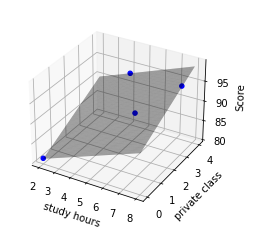

In [12]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기

import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()

# 3차원 '예측 평면'